# Project 2 write-up

## Project group members
- Simran Shah
- Shreyas Patel

## Link
https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets?select=cleaned_5250.csv

## Description of each observation

Each observation in the NASA Exoplanet Archive dataset represents a planet outside our solar system (an exoplanet) and its host star. The dataset contains details about the exoplanet's characteristics and those of its host star, as well as the techniques used to find it.

## Description of each variable

There are 13 variables in the dataset,
- name: The name of the exoplanet.
- distance: The distance between the exoplanet and Earth, measured in parsecs.
- stellar_magnitude: The brightness of the host star, measured in magnitudes.
- planet_type: A classification of the exoplanet based on its physical characteristics, such as its mass and radius.
- discovery_year: The year in which the exoplanet was discovered.
- mass_multiplier: A factor used to convert the reported mass of the exoplanet to units of Jupiter masses.
- mass_wrt: A reference point used to indicate the mass of the exoplanet relative to another object.
- radius_multiplier: A factor used to convert the reported radius of the exoplanet to units of Jupiter radii.
- radius_wrt: A reference point used to indicate the radius of the exoplanet relative to another object.
- orbital_radius: The distance between the exoplanet and its host star.
- orbital_period: The time it takes for the exoplanet to complete one orbit around its host star, measured in days.
- eccentricity: A measure of how elliptical the exoplanet's orbit is.
- detection_method: The method used to detect the exoplanet.

## Motivation

The NASA Exoplanet Archive collection can be used for data analytics to gain important insights and information about the features and traits of exoplanets and their home stars. This can help in a better understanding of how planets in our galaxy develop, evolve, and interact with their environments. Data analytics methods can be used to spot patterns and trends in the data, such as relationships between exoplanet mass and radius or between a planet's distance from its star and the possibility that it has an atmosphere. The development of models and ideas concerning the formation and evolution of exoplanets can then be done using these patterns and trends.

## Five Questions
- How many planets have the same characteristics as Earth?
- Planets that have the same characteristics are more likely to be which type (Gas-Giant or Neptune Like)?
- Planets are more likely to be which type?
- How much is the average radius for Earth-like planets?
- How long on average is a Planet from Earth?
- Which planets are habitable for Human Beings?

In [1]:
## Importing Library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import metrics

In [2]:
# Reading csv file
nasa = pd.read_csv('cleaned_5250.csv')
nasa.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


### Planets are more likely to be which type?

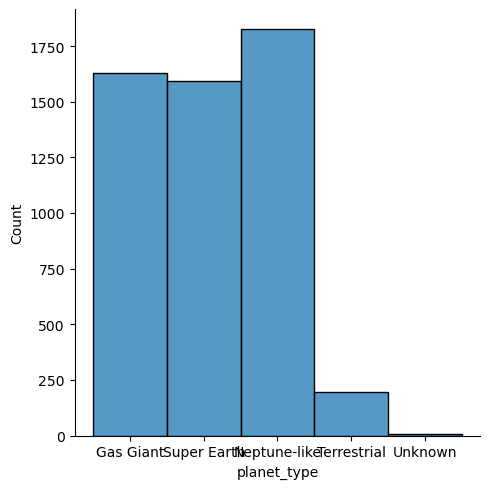

In [3]:
sns.displot(data=nasa, x='planet_type')
plt.savefig('nasa_planet_type.png')
plt.show()

#### As you can see from this Neptune-like planets (cold planets) are in the solar system.
#### Here is the order:
#### Neptune-Like -> Gas Giant -> Super Earth -> Terrestrial -> unknown


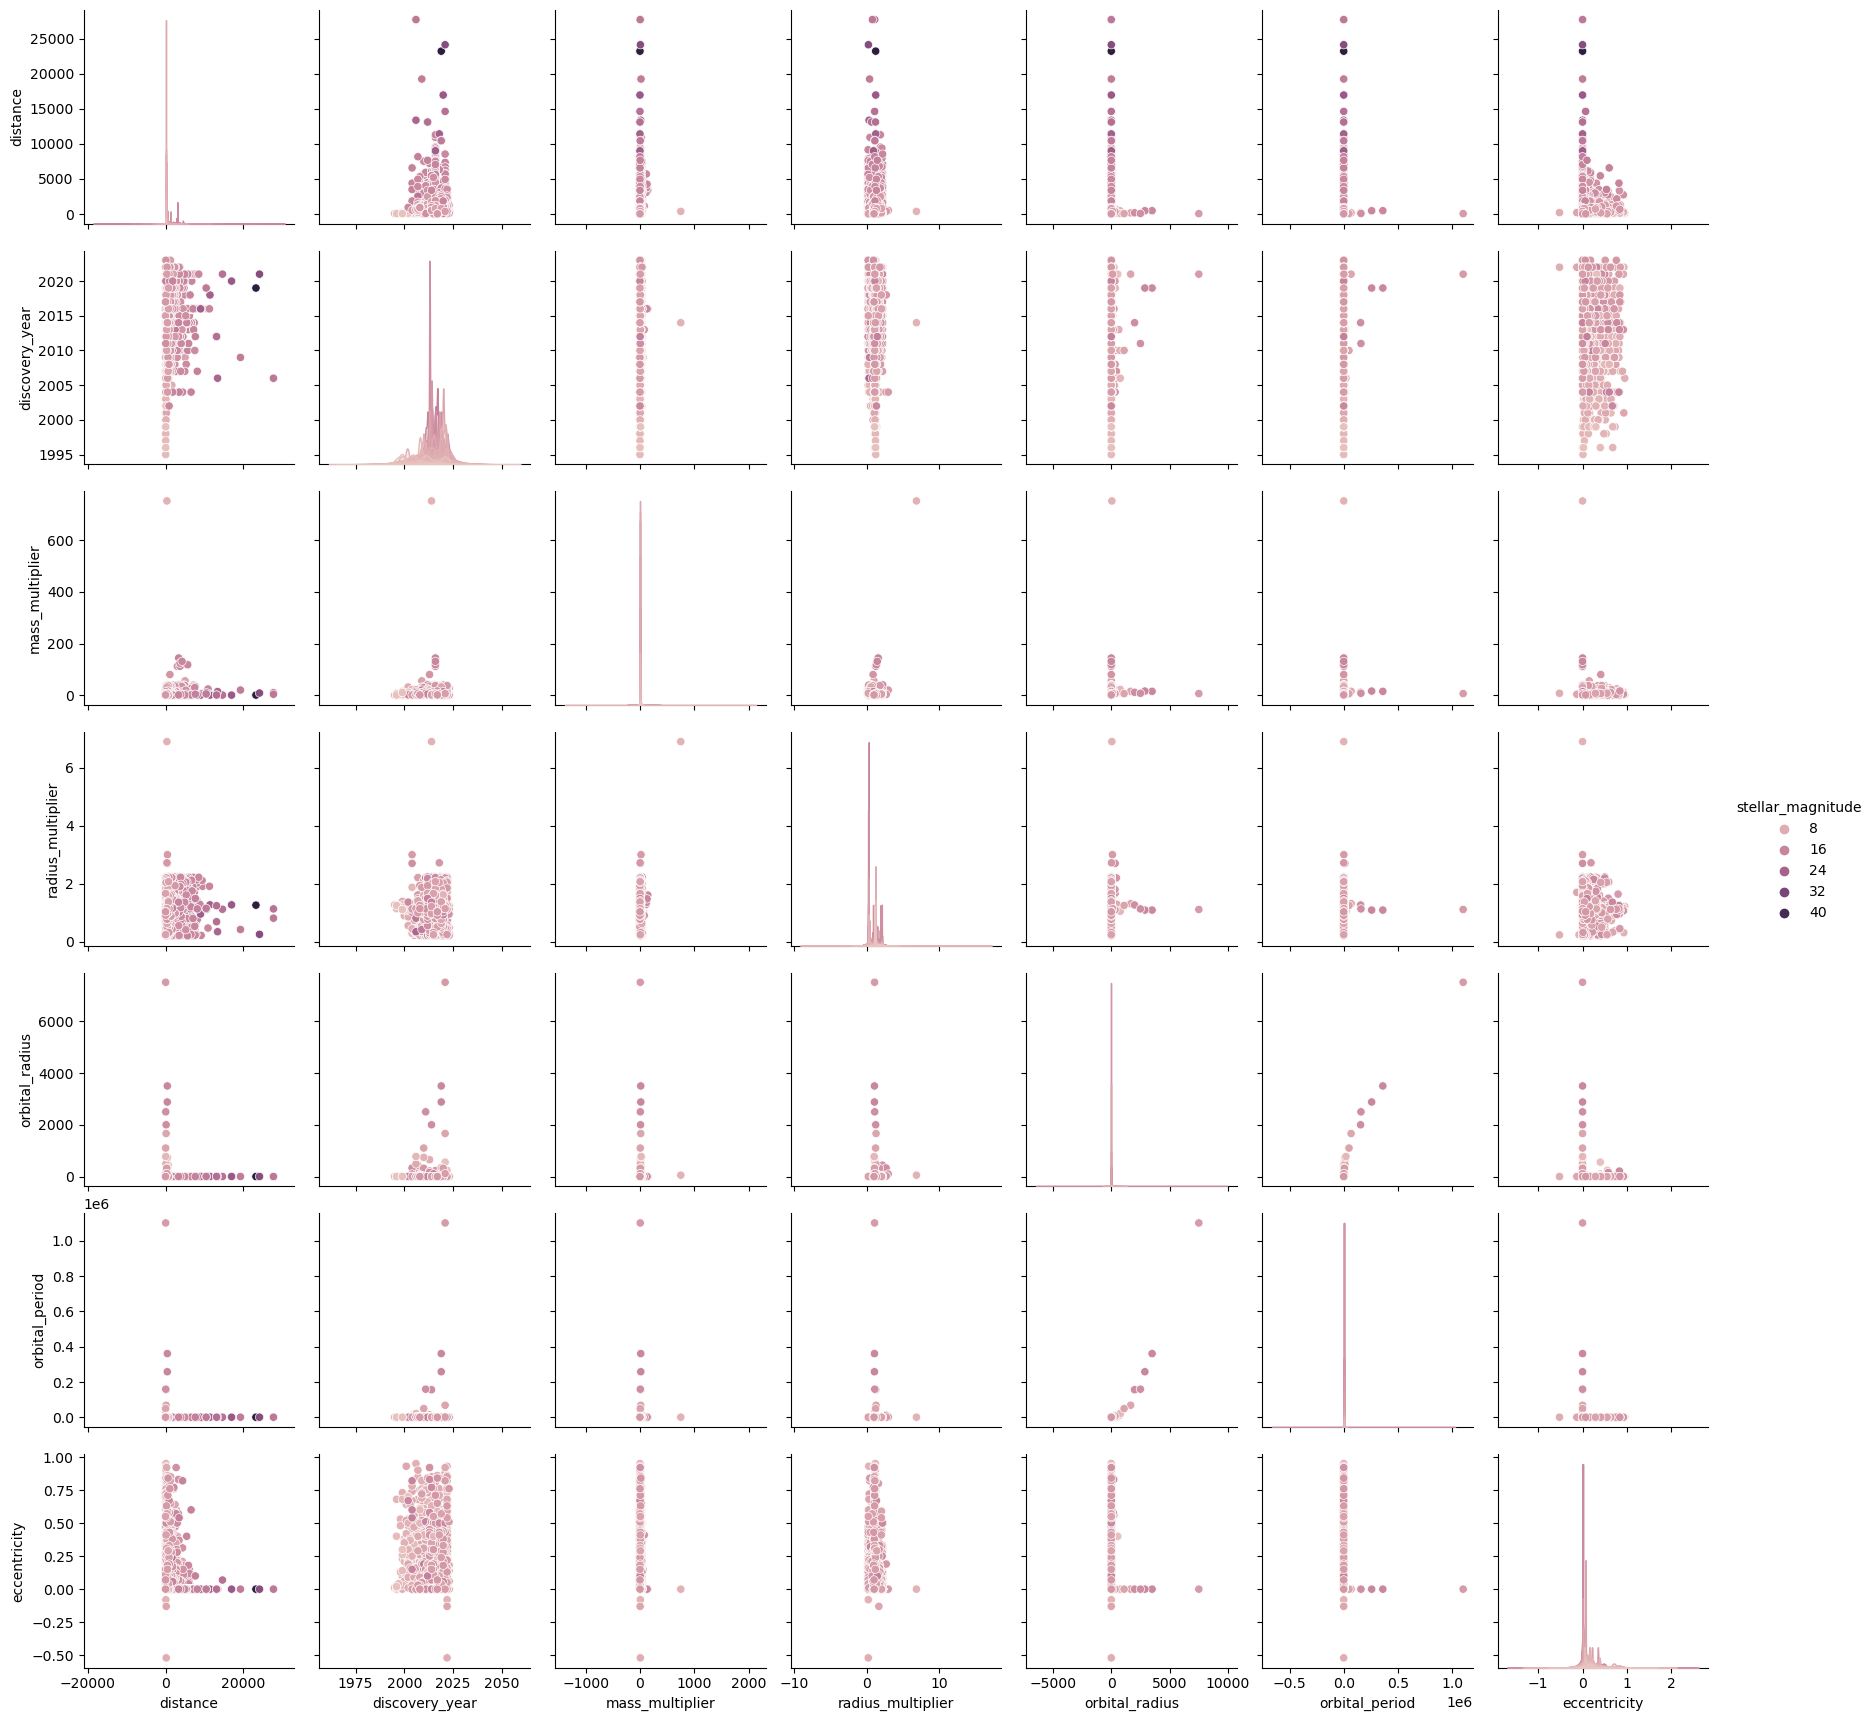

In [4]:
sns.pairplot(data=nasa, hue='stellar_magnitude')
plt.show()

### As you can see above Majority of the outliers are found in orbital_radius > 5000 and orbital_period > 0.5.

## T-test

In [5]:
group1 = nasa[nasa['mass_multiplier'] == 1]['radius_multiplier']
group2 = nasa[nasa['radius_multiplier'] == 2]['mass_multiplier']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print('T-Statistic:', t_statistic)
print('P-Value:', p_value)
if p_value < 0.05:
    print('There is a significant difference between the two groups.')
else:
    print('There is no significant difference between the two groups.')


T-Statistic: -2.55748718234329
P-Value: 0.016722178844242718
There is a significant difference between the two groups.


### There is significant difference between 2 groups as P-value is lower than 0.05.

## Linear Regression

In [6]:
nasa = nasa.dropna()
stats.linregress(x = nasa["distance"], y = nasa["eccentricity"])

LinregressResult(slope=-2.4935294256177226e-05, intercept=0.11242792408441929, rvalue=-0.31127384113237555, pvalue=1.4579466024832974e-107, stderr=1.1030661814215443e-06, intercept_stderr=0.00281520198728659)

#### We can see from the given Linregress Result that the linear regression line's slope is -2.4935294256177226e-05 and its intercept is 0.11242792408441929. The strength of the linear relationship between the two variables is indicated by the r-value, which is -0.31127384113237555. A weak negative linear relationship between the variables is shown by this negative number.

## Linear models

### Split train and test data

In [7]:
nasa = nasa.dropna()
X = nasa.drop(['name','mass_multiplier','planet_type','mass_wrt','radius_wrt','detection_method'], axis=1)
y = nasa['mass_multiplier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (3812, 7)
Testing set shape: (953, 7)


### Linear Regression

In [8]:
model = LinearRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.01122498533347438
Test score:  0.0036391628263412468


In [9]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : model.coef_}).sort_values("coefficient")

,column,coefficient
3,radius_multiplier,-0.444168
1,stellar_magnitude,-0.440037
5,orbital_period,-0.000134
0,distance,0.000716
4,orbital_radius,0.018703
2,discovery_year,0.204194
6,eccentricity,0.460024


In [10]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(y_pred_train)
print('R-square score for training data',metrics.r2_score(y_train, y_pred_train))
print('R-square score for testing data',metrics.r2_score(y_test, y_pred_test))

[6.01361303 7.07035382 6.60113361 ... 6.16898536 6.5851869  8.9520264 ]
R-square score for training data 0.01122498533347438
R-square score for testing data 0.0036391628263412468


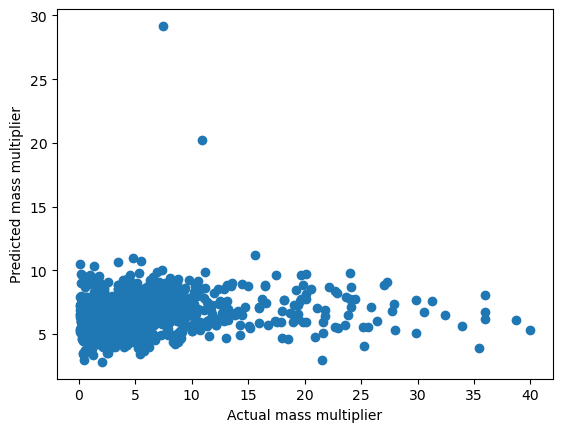

In [11]:
# Plotting data using Linear regression
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual mass multiplier')
plt.ylabel('Predicted mass multiplier')
plt.show()

### Ridge

In [12]:
model = Ridge(alpha=1.0).fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.011224981144650648
Test score:  0.003616987975395003


In [13]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : model.coef_}).sort_values("coefficient")

,column,coefficient
3,radius_multiplier,-0.443867
1,stellar_magnitude,-0.440169
5,orbital_period,-0.000134
0,distance,0.000716
4,orbital_radius,0.018702
2,discovery_year,0.204180
6,eccentricity,0.452642


In [14]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(y_pred_train)
print('R-square score for training data',metrics.r2_score(y_train, y_pred_train))
print('R-square score for testing data',metrics.r2_score(y_test, y_pred_test))

[6.01374761 7.06612259 6.60139887 ... 6.16879011 6.58581168 8.95293391]
R-square score for training data 0.011224981144650648
R-square score for testing data 0.003616987975395003


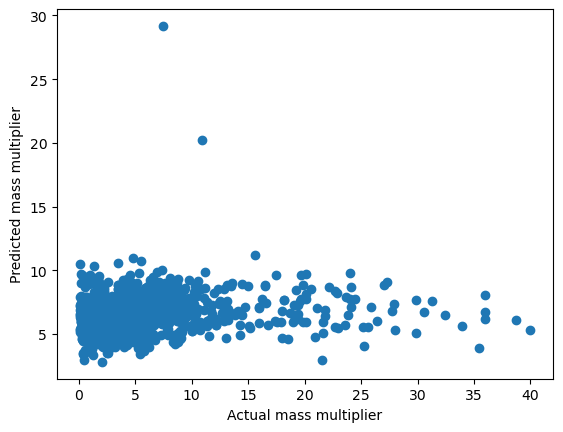

In [15]:
# Plotting data using Linear regression
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual mass multiplier')
plt.ylabel('Predicted mass multiplier')
plt.show()

### Lasso

In [16]:
model = Lasso(alpha=1.0).fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.009501601613504662
Test score:  -0.006589437792720032


In [17]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : model.coef_}).sort_values("coefficient")

,column,coefficient
1,stellar_magnitude,-0.246195
5,orbital_period,-0.000128
3,radius_multiplier,-0.000000
6,eccentricity,0.000000
0,distance,0.000524
4,orbital_radius,0.017872
2,discovery_year,0.120887


In [18]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(y_pred_train)
print('R-square score for training data',metrics.r2_score(y_train, y_pred_train))
print('R-square score for testing data',metrics.r2_score(y_test, y_pred_test))

[5.90685583 6.8344731  6.98871043 ... 6.30122213 6.97986783 7.80256736]
R-square score for training data 0.009501601613504662
R-square score for testing data -0.006589437792720032


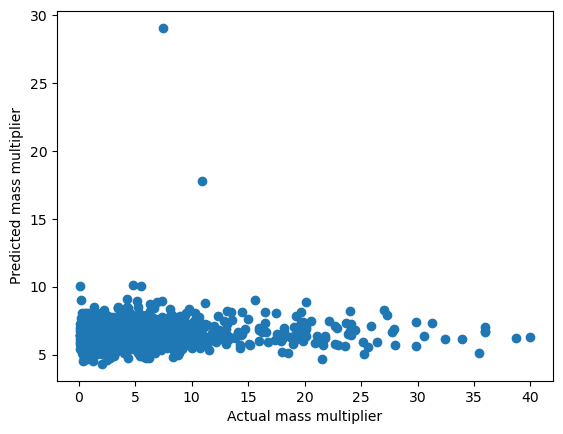

In [19]:
# Plotting data using Linear regression
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual mass multiplier')
plt.ylabel('Predicted mass multiplier')
plt.show()

### Suggested Model : Linear Regression model for its good testing score

## Filtering

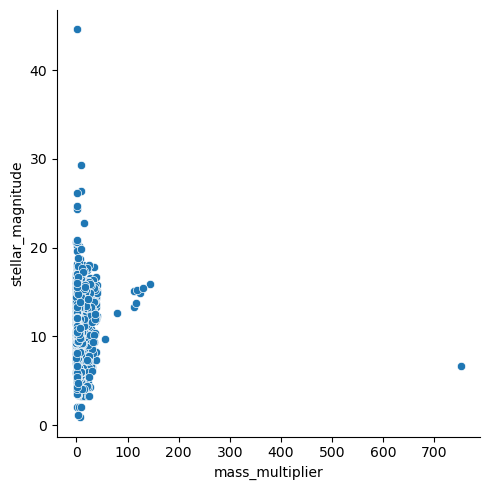

In [20]:
sns.relplot(data=nasa, x="mass_multiplier", y="stellar_magnitude")
plt.show()

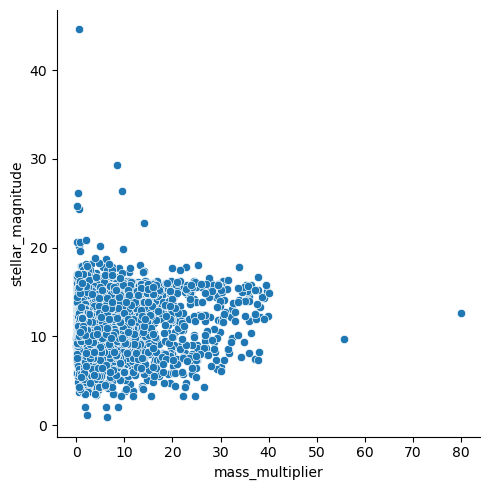

In [21]:
nasa_filter = nasa[nasa["mass_multiplier"] < 100]
sns.relplot(data=nasa_filter, x="mass_multiplier", y="stellar_magnitude")
plt.show()

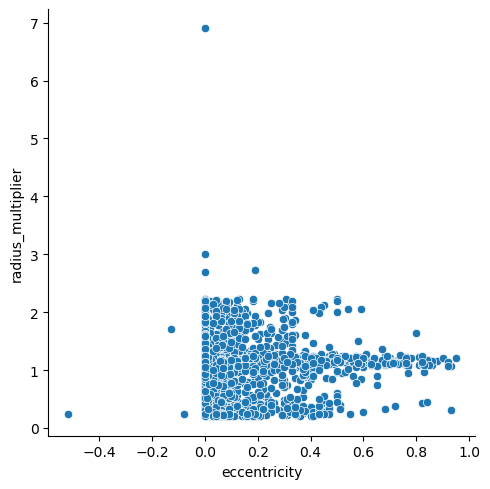

In [22]:
sns.relplot(data=nasa, x="eccentricity", y="radius_multiplier")
plt.show()

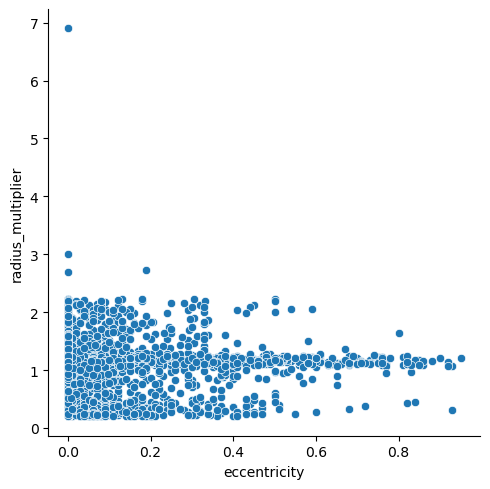

In [23]:
nasa_filter = nasa[nasa["eccentricity"] >= 0.0]
sns.relplot(data=nasa_filter, x="eccentricity", y="radius_multiplier")
plt.show()

## How much is the average radius for Earth-like planets?

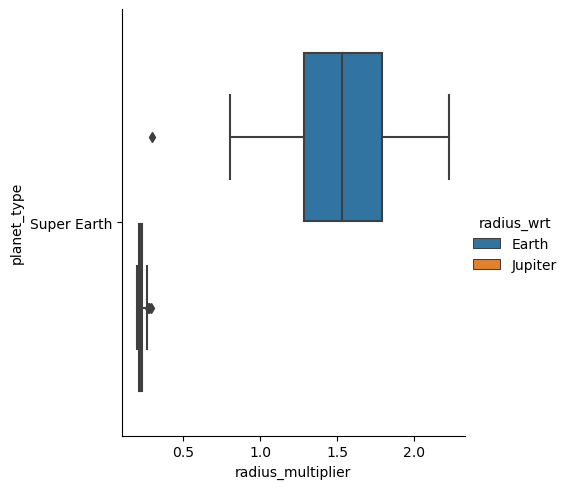

In [24]:
nasa_earth = nasa[nasa["planet_type"] == "Super Earth"]
sns.catplot(data=nasa_earth, x="radius_multiplier", y="planet_type", kind="box", hue="radius_wrt")
plt.show()

### There are 2 kind of super earth, min radius of jupiter is very less compared to earth.

In [25]:
X = nasa.drop(['name','planet_type','mass_wrt','radius_wrt','detection_method'], axis=1)
y = nasa['radius_wrt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=234)

In [26]:
model = LogisticRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.8709338929695698
Test score:  0.8845750262329486


/Users/shreyaspatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : model.coef_[0]}).sort_values("coefficient")

,column,coefficient
4,radius_multiplier,-4.153658
1,stellar_magnitude,-0.523002
0,distance,0.000377
2,discovery_year,0.005336
3,mass_multiplier,0.049397
5,orbital_radius,0.104944
7,eccentricity,0.170539
6,orbital_period,0.589672


#### Variable "radius_multiplier" has the largest effect on the prediction.

In [28]:
y_pred = model.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[297,  52],
       [ 58, 546]])

#### Confusion matrix indicates that the model correctly classified 165 positive instances and 167 negative instances, but made 21 false positive errors and 26 false negative errors.

In [29]:
y_pred = model.predict(X_train)
metrics.confusion_matrix(y_train, y_pred)

array([[1191,  236],
       [ 256, 2129]])

#### Confusion matrix indicates that the model correctly classified 1191 positive instances and 2129 negative instances, but made 236 false positive errors and 256 false negative errors. 

### With comparison to both confusion metrics, false negative errors are more than false positive errors. Thus, we would not recommend this model for prediction.

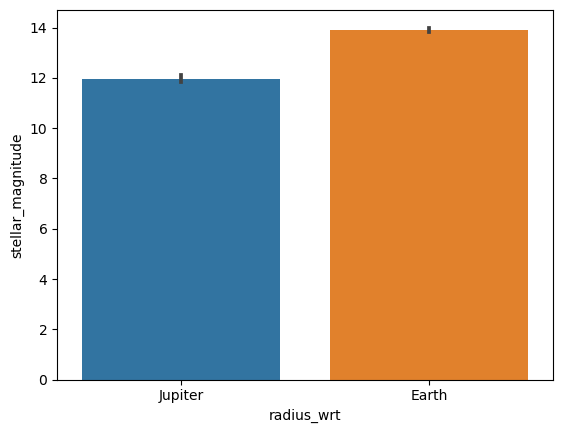

In [30]:
sns.barplot(data=nasa, x="radius_wrt", y="stellar_magnitude")
plt.show()

## Challenge Problem

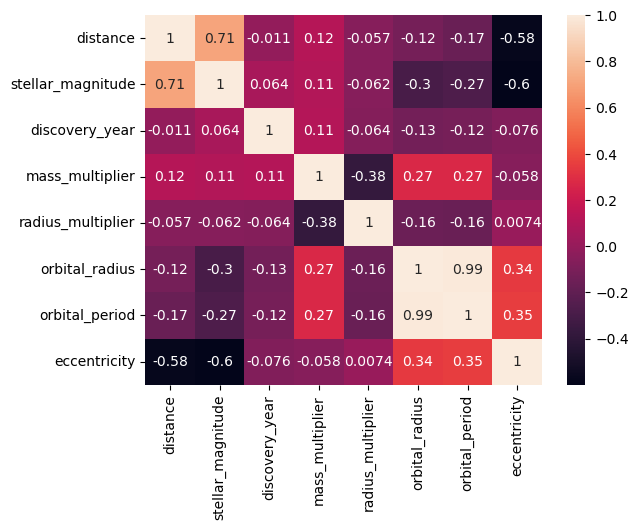

In [31]:
sns.heatmap(nasa.corr(method = "spearman"), annot=True)
plt.show()

In [32]:
nasa.corr(method = "spearman")

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
distance,1.000000,0.709549,-0.011095,0.115767,-0.056798,-0.123315,-0.166453,-0.578224
stellar_magnitude,0.709549,1.000000,0.064140,0.105749,-0.061616,-0.295286,-0.272809,-0.599979
discovery_year,-0.011095,0.064140,1.000000,0.109490,-0.063895,-0.130032,-0.117007,-0.075928
mass_multiplier,0.115767,0.105749,0.109490,1.000000,-0.376051,0.271047,0.273169,-0.057559
radius_multiplier,-0.056798,-0.061616,-0.063895,-0.376051,1.000000,-0.160490,-0.164186,0.007386
orbital_radius,-0.123315,-0.295286,-0.130032,0.271047,-0.160490,1.000000,0.992084,0.342626
orbital_period,-0.166453,-0.272809,-0.117007,0.273169,-0.164186,0.992084,1.000000,0.350730
eccentricity,-0.578224,-0.599979,-0.075928,-0.057559,0.007386,0.342626,0.350730,1.000000


#### The correlation coefficients indicate that a number of the variables are highly connected with one another. For instance, the correlation between distance and star magnitude is 0.7095, indicating a reasonably robust positive linear relationship. The correlation coefficient between orbital radius and orbital period, which is 0.9921, also points to a very strong positive linear relationship.
#### However, the connections between eccentricity and the other factors appear to be somewhat weak, with the majority of the correlation coefficients being negative and of modest value. This shows that, when compared to the other variables, eccentricity may be a comparatively independent variable.

## Conclusion

1. Majority of the planets are of type Neptune-like which are cold planets.
2. Comparatively, radius multiplier of earth is more than jupiter, although jupiter has higher radius then earth.

- The first point makes the claim that the majority of the planets in our universe share Neptune's features as cold planets. As a gas giant with a mostly hydrogen, helium, and methane atmosphere, Neptune is one of the coldest planets in our solar system. The majority of the planets in our universe may not contain the prerequisites for life, according to this assertion, which suggests that they may not be habitable for humans.
- Comparing the radius multipliers of Earth and Jupiter is the second point. The radius multiplier, a measurement of a planet's size in relation to another planet, is obtained by dividing one planet's radius by another planet's radius. Although Jupiter has a radius greater than Earth's, Earth has a greater radius multiplier than Jupiter, according to the assertion. This suggests that in comparison to the other planets, Earth is physically smaller than Jupiter.
- A graph can be used to illustrate the comparison between the radius multipliers of Earth and Jupiter. On the x-axis of the graph, several planets' radius multipliers might be shown, together with the respective planets' radii on the y-axis. The graph would demonstrate that, despite Jupiter having a larger radius than Earth, Earth's radius multiplier is greater than Jupiter's, showing that Earth is physically smaller than Jupiter.


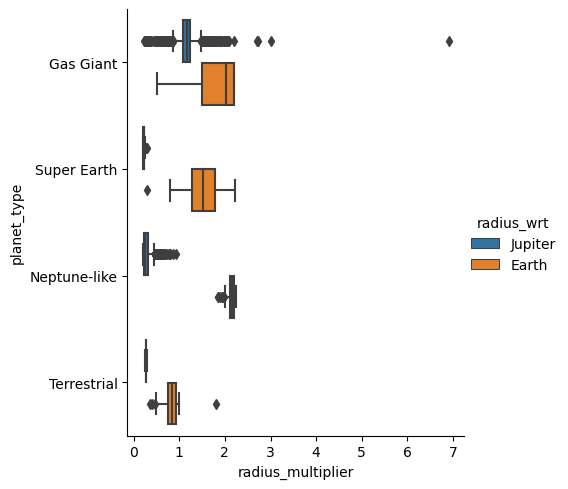

In [33]:
nasa_earth = nasa[nasa["planet_type"] == "Super Earth"]
sns.catplot(data=nasa, x="radius_multiplier", y="planet_type", kind="box", hue="radius_wrt")
plt.show()